# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [10]:
# importing required libraries

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.model_selection import GridSearchCV

# 1.1 Reading Data

In [11]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [12]:
!ls "/content/drive/My Drive/Colab Notebooks/Dataset/Assignments_DonorsChoose_2018"

'06 Implement SGD.ipynb'	      confusion_matrix.png
 10_DonorsChoose_Clustering.ipynb     cooc.JPG
 11_DonorsChoose_TruncatedSVD.ipynb   glove_vectors
 2_DonorsChoose_EDA_TSNE.ipynb	      haberman.csv
 2letterstabbrev.pdf		      haberman.xlsx
 3d_plot.JPG			      heat_map.JPG
 3d_scatter_plot.ipynb		      imdb.txt
 4_DonorsChoose_NB.ipynb	      resources.csv
 5_DonorsChoose_LR.ipynb	      response.JPG
 7_DonorsChoose_SVM.ipynb	      summary.JPG
 8_DonorsChoose_DT.ipynb	      test_data.csv
 9_DonorsChoose_RF_GBDT.ipynb	      train_cv_auc.JPG
 Assignment_SAMPLE_SOLUTION.ipynb     train_data.csv
'Assignment_tips(1).docx'	      train_test_auc.JPG
 Assignment_tips.docx


In [0]:
# Reading data from project and resources data file

project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Assignments_DonorsChoose_2018/resources.csv')


In [14]:
# Getting basic information about the data

print("Number of data points in Project_train data", project_data.shape)
print('-'*100)
print("The attributes of Project_train data :", project_data.columns.values)
print('='*100)
print("Number of data points in Resource_train data", resource_data.shape)
print('-'*100)
print("The attributes of Resource_train data :", resource_data.columns.values)

Number of data points in Project_train data (109248, 17)
----------------------------------------------------------------------------------------------------
The attributes of Project_train data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
Number of data points in Resource_train data (1541272, 4)
----------------------------------------------------------------------------------------------------
The attributes of Resource_train data : ['id' 'description' 'quantity' 'price']


# 1.2 Data Pre-Processing

In [15]:
# Merge two column text dataframe: 
# Merge 4 essays into one:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

# Merge Price information from resource data to project data
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

# find how many digits are present in each project_resource_summary coloumn
summary = list(project_data['project_resource_summary'].values)
presence_of_numeric_data=[]
for i in summary:
    count = 0
    for j in i.split(' '):
        if j.isdigit():
            count+=1
    presence_of_numeric_data.append(count)

# Replace Text summary coloumn with new numerical coloumn presence_of_numeric_data
project_data['numerical_data_in_resource_summary'] = presence_of_numeric_data
project_data.drop(['project_resource_summary'], axis=1, inplace=True)

# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# Here we drop 3 rows where teacher_prefix is having np.nan value
project_data.dropna(axis=0,subset=['teacher_prefix'], inplace=True)

project_data.head(2)

Unnamed: 0       id  ... quantity numerical_data_in_resource_summary
55660        8393  p205479  ...        4                                  0
76127       37728  p043609  ...        8                                  0

[2 rows x 20 columns]

## 1.2.1 Pre-Processing Essay Text

In [16]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

# Adding preprocessed_essays coloumn to our data matrix   

project_data['preprocessed_essays']=preprocessed_essays

100%|██████████| 109245/109245 [01:05<00:00, 1679.72it/s]


In [20]:
# after preprocesing
preprocessed_essays[100]

'a typical day campus exciting my students love learning always put smile face they big personalities even bigger dedication learning they need hero someone willing change future every child deserves champion adult never give understand power connection insists become best rita pierson we school 610 low income students grades k 6 we eager bunch love learn we high expectations learning low resources impact learning with new technology aim high rise occasion i would love incorporate technology intervention time i empower students empowering students starts able give goals tools need successful school my students use ipads foster love learning remediation enrichment students low income families need engagement motivation succeed ipads bring closer achieving success classroom real world my project make difference allowing students access programs reinforce classroom learning motivating stay focused sustained engagement'

## 1.2.2 Pre-Processing Project Title Text

In [21]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for title in tqdm(project_data['project_title'].values):
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(e for e in title.split() if e not in stopwords)
    preprocessed_titles.append(title.lower().strip())

# Adding preprocessed_titles coloumn to our data matrix   

project_data['preprocessed_titles']=preprocessed_titles
preprocessed_titles[1000]

100%|██████████| 109245/109245 [00:02<00:00, 38812.80it/s]


'empowering students through art learning about then now'

## 1.2.3 Pre-Processing Project Grades

In [22]:
# Remove special characters from grades
from tqdm import tqdm
preprocessed_grade_categories = []
# tqdm is for printing the status bar
for categories in tqdm(project_data['project_grade_category'].values):
    categories = decontracted(categories)
    # https://gist.github.com/sebleier/554280
    categories = '_'.join(e for e in categories.split(' ') if e not in stopwords)
    categories = '_'.join(e for e in categories.split('-') if e not in stopwords)
    preprocessed_grade_categories.append(categories.lower().strip())

# Adding preprocessed_titles coloumn to our data matrix   

project_data['preprocessed_grade_category']=preprocessed_grade_categories

project_data.head(5)

100%|██████████| 109245/109245 [00:02<00:00, 50732.99it/s]


Unnamed: 0  ... preprocessed_grade_category
55660        8393  ...               grades_prek_2
76127       37728  ...                  grades_3_5
51140       74477  ...               grades_prek_2
473        100660  ...               grades_prek_2
41558       33679  ...                  grades_3_5

[5 rows x 23 columns]

## 1.2.4 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)


## 1.2.5 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)


In [0]:
# Drop all unnecessary featurs like project_grade_category, project_essay_1, etc.
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
project_data.drop(['essay'], axis=1, inplace=True)


In [26]:
project_data.head(5)

Unnamed: 0  ...                 clean_subcategories
55660        8393  ...  AppliedSciences Health_LifeScience
76127       37728  ...                        SpecialNeeds
51140       74477  ...                            Literacy
473        100660  ...                    EarlyDevelopment
41558       33679  ...                            Literacy

[5 rows x 17 columns]

## 1.2.6 Add Sentiment Score of Preprocessed Essays

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
neg_essay=[]
neu_essay=[]
pos_essay=[]
comp_essay=[]

sid = SentimentIntensityAnalyzer()

for sent in preprocessed_titles:
    
    ss = sid.polarity_scores(sent)
    neg_essay.append(ss.get('neg'))
    neu_essay.append(ss.get('neu'))
    pos_essay.append(ss.get('pos'))
    comp_essay.append(ss.get('compound'))

project_data['neg_essay']=neg_essay
project_data['neu_essay']=neu_essay
project_data['pos_essay']=pos_essay
project_data['comp_essay']=comp_essay

    
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

In [29]:
project_data.head(5)

Unnamed: 0       id  ... pos_essay comp_essay
55660        8393  p205479  ...     0.000     0.0000
76127       37728  p043609  ...     0.000     0.0000
51140       74477  p189804  ...     0.000     0.0000
473        100660  p234804  ...     0.655     0.4215
41558       33679  p137682  ...     0.000     0.0000

[5 rows x 21 columns]

## 1.2.7 Adding number of words in title and number of words in essays as two new numerical features

In [0]:

number_of_words_in_title=[]
for title in project_data['project_title'].values:
    list_of_words = title.split()
    number_of_words_in_title.append(len(list_of_words))
    
number_of_words_in_essays=[]
for title in project_data['preprocessed_essays'].values:
    list_of_words = title.split()
    number_of_words_in_essays.append(len(list_of_words))
    
project_data['number_of_words_in_title'] = number_of_words_in_title
project_data['number_of_words_in_essays'] = number_of_words_in_essays

In [31]:
project_data.head()

Unnamed: 0       id  ... number_of_words_in_title number_of_words_in_essays
55660        8393  p205479  ...                        6                       175
76127       37728  p043609  ...                        4                       179
51140       74477  p189804  ...                        7                       116
473        100660  p234804  ...                        5                       127
41558       33679  p137682  ...                        7                       114

[5 rows x 23 columns]

# 1.3 Sampling data for Clustering Assignment

In [32]:
project_data['project_is_approved'].value_counts()

1    92703
0    16542
Name: project_is_approved, dtype: int64

In [33]:

data = project_data
data['project_is_approved'].value_counts()

1    92703
0    16542
Name: project_is_approved, dtype: int64

In [34]:
data.head(5)

Unnamed: 0       id  ... number_of_words_in_title number_of_words_in_essays
55660        8393  p205479  ...                        6                       175
76127       37728  p043609  ...                        4                       179
51140       74477  p189804  ...                        7                       116
473        100660  p234804  ...                        5                       127
41558       33679  p137682  ...                        7                       114

[5 rows x 23 columns]

In [35]:
# Split the class label from data
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(5)
print(y.shape)

(109245,)


In [36]:
data = X
data.shape

(109245, 22)

# 2.1 Make Data Model Ready:


## 2.1.1 Encoding numerical, categorical features

### 2.1.1.1 Encoding School State

In [37]:

# Encoding School State

vectorizer = CountVectorizer()
vectorizer.fit(data['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
data_state_ohe = vectorizer.transform(data['school_state'].values)

print("After vectorizations")
print(data_state_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109245, 51)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 2.1.1.2 Encoding Teacher Prefix

In [38]:
vectorizer = CountVectorizer()
vectorizer.fit(data['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
data_teacher_ohe = vectorizer.transform(data['teacher_prefix'].values)

print("After vectorizations")
print(data_teacher_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109245, 5)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### 2.1.1.3 Encoding preprocessed_grade_category

In [39]:

vectorizer = CountVectorizer()
vectorizer.fit(data['preprocessed_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
data_grade_ohe = vectorizer.transform(data['preprocessed_grade_category'].values)

print("After vectorizations")
print(data_grade_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109245, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 2.1.1.4 Encoding numerical feature Price

In [40]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(data['price'].values.reshape(1,-1))

data_price_norm = normalizer.transform(data['price'].values.reshape(1,-1))

data_price_norm = data_price_norm.reshape(-1,1)



print("After vectorizations")
print(data_price_norm.shape)
print(data_price_norm)

print("="*100)

After vectorizations
(109245, 1)
[[4.63569227e-03]
 [1.36203231e-03]
 [2.10350012e-03]
 ...
 [2.55105333e-03]
 [1.83963553e-03]
 [3.51648955e-05]]


### 2.1.1.5 Encoding numeric feature Quantity 

In [41]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(data['quantity'].values.reshape(1,-1))

data_quantity_norm = normalizer.transform(data['quantity'].values.reshape(1,-1))
data_quantity_norm = data_quantity_norm.reshape(-1,1)
print(data_quantity_norm)
print("After vectorizations")
print(data_quantity_norm.shape)

print("="*100)

[[3.87895138e-04]
 [7.75790277e-04]
 [9.69737846e-05]
 ...
 [4.84868923e-04]
 [3.87895138e-04]
 [2.42434461e-03]]
After vectorizations
(109245, 1)


### 2.1.1.6 Encoding numeric feature teacher_number_of_previously_posted_projects 

In [42]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(data['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#List_of_imp_features.append('teacher_number_of_previously_posted_projects')
data_teacher_number_of_previously_posted_projects_norm = normalizer.transform(data['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
data_teacher_number_of_previously_posted_projects_norm = data_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

print("After vectorizations")
print(data_teacher_number_of_previously_posted_projects_norm.shape)
print("="*100)

After vectorizations
(109245, 1)


### 2.1.1.7 Encoding numeric feature numerical_data_in_resource_summary 

In [43]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(data['numerical_data_in_resource_summary'].values.reshape(1,-1))
data_numerical_data_in_resource_summary_norm = normalizer.transform(data['numerical_data_in_resource_summary'].values.reshape(1,-1))

data_numerical_data_in_resource_summary_norm = data_numerical_data_in_resource_summary_norm.reshape(-1,1)

print("After vectorizations")
print(data_numerical_data_in_resource_summary_norm.shape)

print("="*100)

After vectorizations
(109245, 1)


### 2.1.1.8 Encoding numeric feature number_of_words_in_title 

In [44]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(data['number_of_words_in_title'].values.reshape(1,-1))

data_number_of_words_in_title = normalizer.transform(data['number_of_words_in_title'].values.reshape(1,-1))

data_number_of_words_in_title = data_number_of_words_in_title.reshape(-1,1)

print("After vectorizations")
print(data_number_of_words_in_title.shape)
print(data_number_of_words_in_title)

print("="*100)

After vectorizations
(109245, 1)
[[0.00326648]
 [0.00217765]
 [0.00381089]
 ...
 [0.00489971]
 [0.00217765]
 [0.00163324]]



### 2.1.1.9 Encoding numeric feature number_of_words_in_essay

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(data['number_of_words_in_essays'].values.reshape(1,-1))

data_number_of_words_in_essay = normalizer.transform(data['number_of_words_in_essays'].values.reshape(1,-1))

data_number_of_words_in_essay = data_number_of_words_in_essay.reshape(-1,1)

print("After vectorizations")
print(data_number_of_words_in_essay.shape)
print(data_number_of_words_in_essay)
print("="*100)

After vectorizations
(109245, 1)
[[0.00338651]
 [0.00346391]
 [0.00224477]
 ...
 [0.0032704 ]
 [0.00239958]
 [0.00232218]]


### 2.1.1.10 Encoding numeric features of sentiment Score

In [0]:
data_neg_essay = data['neg_essay'].values.reshape(-1,1)
data_neu_essay = data['neu_essay'].values.reshape(-1,1)
data_pos_essay = data['pos_essay'].values.reshape(-1,1)
data_comp_essay = data['comp_essay'].values.reshape(-1,1)

<h2>2.4 Dimensionality Reduction on the selected features </h2>

# 2.2 Appling Clustering on TFIDF featurization


## 2.2.1 Applying Clustering on TFIDF encoding eassay, and project_title

### 2.2.1.1 Encoding  preprocessed_titles TFIDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)

#vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
vectorizer.fit(data['preprocessed_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
data_titles_tfidf = vectorizer.transform(data['preprocessed_titles'].values)

print("After vectorizations")
print(data_titles_tfidf.shape)
print("="*100)



After vectorizations
(109245, 3329)


### 2.2.1.2 Encoding  preprocessed_essays TFIDF 

In [48]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
vectorizer.fit(data['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
data_essay_tfidf = vectorizer.transform(data['preprocessed_essays'].values)

print("After vectorizations")
print(data_essay_tfidf.shape)
print("="*100)



After vectorizations
(109245, 10000)


In [49]:
data_titles_tfidf[:5000,:]

<5000x3329 sparse matrix of type '<class 'numpy.float64'>'
	with 18647 stored elements in Compressed Sparse Row format>

### 2.2.1.3 Merge all the features and obtain final data matrix

In [50]:
from sklearn.feature_selection import SelectKBest, chi2
from scipy.sparse import hstack
data_train = hstack((data_titles_tfidf[:5000,:],data_essay_tfidf[:5000,:], data_state_ohe[:5000,:], data_teacher_ohe[:5000,:], data_grade_ohe[:5000,:], data_price_norm[:5000,:], data_numerical_data_in_resource_summary_norm[:5000,:], data_teacher_number_of_previously_posted_projects_norm[:5000,:], data_quantity_norm[:5000,:])).tocsr()

print("Final Data matrix")
print(data_train.shape)

print("="*100)

# Select best K features
# https://www.w3cschool.cn/doc_scikit_learn/scikit_learn-modules-generated-sklearn-feature_selection-selectkbest.html
# https://www.programcreek.com/python/example/93974/sklearn.feature_selection.SelectKBest

X_new = SelectKBest(chi2, k=5000).fit(data_train,y[:5000])
data_train_best_k = X_new.transform(data_train)
print(data_train_best_k.shape)

Final Data matrix
(5000, 13393)
(5000, 5000)


## 2.2.2 K-Means Clustering

### 2.2.2.1 Find best K in K-means


In [51]:
# Find best K using elbow method k-means
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
inertias = [] 
mapping = {} 
K = range(1,11) 

for k in tqdm(K): 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(data_train_best_k) 
	kmeanModel.fit(data_train_best_k)	  
	inertias.append(kmeanModel.inertia_) 
	mapping[k] = kmeanModel.inertia_ 




100%|██████████| 10/10 [04:15<00:00, 29.32s/it]


1 : 13635.873158010869
2 : 12049.628197527496
3 : 11117.85477140785
4 : 10740.63318672
5 : 10231.326085158418
6 : 9958.712920229018
7 : 9831.32366635334
8 : 9554.609353460295
9 : 9551.586223409699
10 : 9408.724927873958


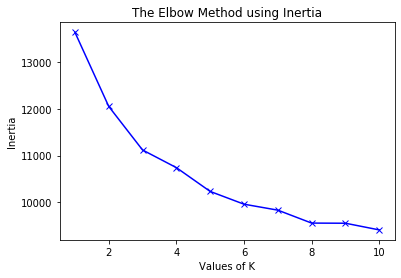

In [52]:
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

for key,val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

### 2.2.2.2 Apply K-Means on Best K

In [0]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(data_train_best_k)

In [54]:
essay = data['preprocessed_essays'].iloc[0:5000].values
print(essay)

['i fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed i would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons my students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students each month i try several science stem steam projects i would use kits robot help guide science instruction engaging meaningful ways i adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed the following units taught next school year i implement kits magnets motion sink vs float robots i often get units not know if i teaching right way using right materials the kits give additional ideas strategies lessons prepare students science it challenging develop high quality science activities these kits give materials i need provide students science

### 2.2.2.3 Plot Word cloud for each Cluster 

In [0]:
# How to plot word cloud for each cluster
# https://www.datacamp.com/community/tutorials/wordcloud-python
# https://stackoverflow.com/questions/56050925/plotting-wordcloud-for-each-cluster-in-k-means-clustering

cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []
cluster_7 = []
for i in range(kmeans.labels_.shape[0]):
  if kmeans.labels_[i] == 0:
    cluster_1.append(essay[i])
  if kmeans.labels_[i] == 1:
    cluster_2.append(essay[i])
  if kmeans.labels_[i] == 2:
    cluster_3.append(essay[i])
  if kmeans.labels_[i] == 3:
    cluster_4.append(essay[i])
  if kmeans.labels_[i] == 4:
    cluster_5.append(essay[i])
  if kmeans.labels_[i] == 5:
    cluster_6.append(essay[i])
  if kmeans.labels_[i] == 6:
    cluster_7.append(essay[i])

In [56]:
from wordcloud import WordCloud

words_in_cluster=''
for i in cluster_1:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
from wordcloud import WordCloud

words_in_cluster=''
for i in cluster_2:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

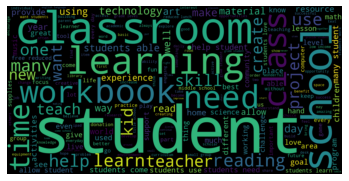

In [58]:
from wordcloud import WordCloud

words_in_cluster=''
for i in cluster_3:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

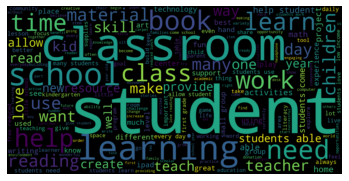

In [59]:
from wordcloud import WordCloud

words_in_cluster=''
for i in cluster_4:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

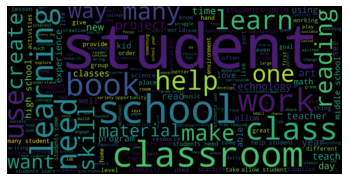

In [60]:
from wordcloud import WordCloud

words_in_cluster=''
for i in cluster_5:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

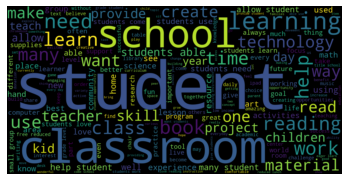

In [61]:
from wordcloud import WordCloud

words_in_cluster=''
for i in cluster_6:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.2.3 Agglomerative Clustering

### 2.2.3.1 Agglomerative clustering for 2 clusters

In [0]:
# https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

from sklearn.cluster import AgglomerativeClustering
ac2=AgglomerativeClustering(n_clusters=2).fit(data_train_best_k.toarray())

In [0]:
cluster_1 = []
cluster_2 = []

for i in range(ac2.labels_.shape[0]):
  if ac2.labels_[i] == 0:
    cluster_1.append(essay[i])
  if ac2.labels_[i] == 1:
    cluster_2.append(essay[i])
  

### 2.2.3.2 Plotting word cloud for 2 clusters

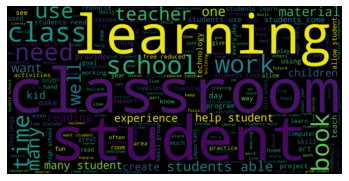

In [64]:
words_in_cluster=''
for i in cluster_1:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

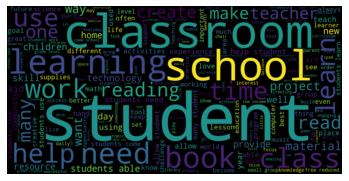

In [65]:
words_in_cluster=''
for i in cluster_2:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.2.3.3 Agglomerative Clustering for 3 clusters

In [0]:
from sklearn.cluster import AgglomerativeClustering
ac2=AgglomerativeClustering(n_clusters=3).fit(data_train_best_k.toarray())

In [0]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(ac2.labels_.shape[0]):
  if ac2.labels_[i] == 0:
    cluster_1.append(essay[i])
  if ac2.labels_[i] == 1:
    cluster_2.append(essay[i])
  if ac2.labels_[i] == 2:
    cluster_3.append(essay[i])

### 2.2.3.4 PLotting word cloud for 3 clusters


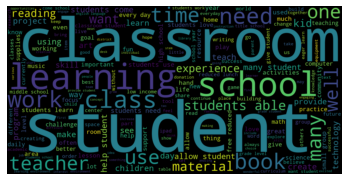

In [68]:
words_in_cluster=''
for i in cluster_1:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

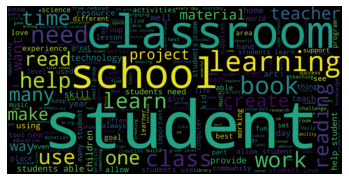

In [69]:
words_in_cluster=''
for i in cluster_2:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
words_in_cluster=''
for i in cluster_3:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.2.3.5 Agglomerative clustering for 4 clusters

In [0]:
from sklearn.cluster import AgglomerativeClustering
ac2=AgglomerativeClustering(n_clusters=4).fit(data_train_best_k.toarray())

In [0]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for i in range(ac2.labels_.shape[0]):
  if ac2.labels_[i] == 0:
    cluster_1.append(essay[i])
  if ac2.labels_[i] == 1:
    cluster_2.append(essay[i])
  if ac2.labels_[i] == 2:
    cluster_3.append(essay[i])
  if ac2.labels_[i] == 3:
    cluster_4.append(essay[i])

### 2.2.3.6 Plotting word cloud for 4 clusters

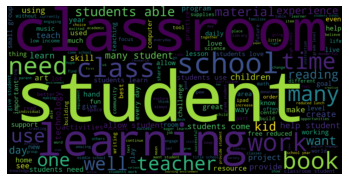

In [73]:
words_in_cluster=''
for i in cluster_1:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

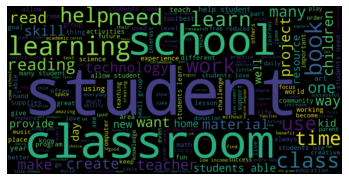

In [74]:
words_in_cluster=''
for i in cluster_2:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

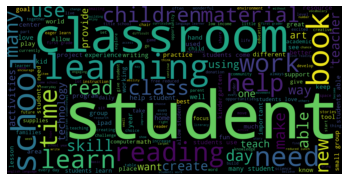

In [75]:
words_in_cluster=''
for i in cluster_3:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
words_in_cluster=''
for i in cluster_4:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
#wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.2.4 DBSCAN Algorithm

### 2.2.4.1 Find best eps using distance vs points graph

100%|██████████| 5000/5000 [05:13<00:00, 15.91it/s]


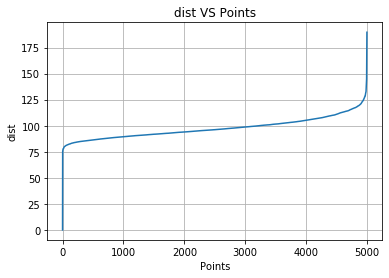

In [0]:
# How to choose eps in DBSCAN
# https://askdatascience.com/646/dbscan-algorithm-how-should-choose-optimal-minimum-points
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

min_points = 2000
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

eps_data = data_train_best_k.toarray();
eps_data=StandardScaler().fit_transform(eps_data)
distance=[]
for point in tqdm(eps_data):
  dist = euclidean_distances(eps_data, point.reshape(1, -1))
  distance.append(dist[min_points])

sorted_distance = np.sort(np.array(distance))
sorted_dist = np.sort(sorted_distance.reshape(1,-1)[0])

points = [i for i in range(len(eps_data))]
plt.plot(points, sorted_dist)
plt.xlabel('Points')
plt.ylabel('dist')
plt.title('dist VS Points')
plt.grid()
plt.show()

### 2.2.4.2 Use best eps and min points for finding number of clusters

In [0]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=80,n_jobs=-1)
dbscan.fit(eps_data)
print('No of clusters: ',len(set(dbscan.labels_)))

No of clusters:  2


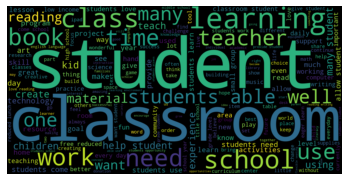

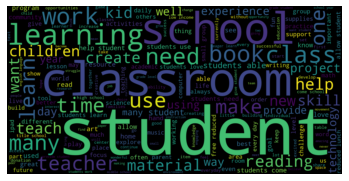

In [80]:
cluster_1=[]
cluster_2=[]
for i in range(dbscan.labels_.shape[0]):
  if dbscan.labels_[i] == 0:
    cluster_1.append(essay[i])
  if dbscan.labels_[i] == -1:
    cluster_2.append(essay[i])
words_in_cluster=''
for i in cluster_1:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
words_in_cluster=''
for i in cluster_2:
  words_in_cluster = words_in_cluster + str(i)
wordcloud = WordCloud(width = 2000, height = 1000).generate(words_in_cluster)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3.1 Conclusions of Clustering on Donors choose

## 3.1.1 K-Means Clustering

1. Since the dataset is large, only first 5k points are taken under consideration.
2. SelectKBest is used to select best 5000 features.
3. Optimal K is selected from range 1 to 11, which turned out to be 7 using elbow method. (Inertia vs K plot)
4. Trained the model and separated essay text feature into 7 different clusters. Word cloud is plotted for all of the 7 clusters.

## 3.1.2 Agglomerative Clustering

1. Since the dataset is large, only first 5k points are taken under consideration.
2. SelectKBest is used to select best 5000 features. So data matrix is 5k X 5k
3. Trained Agglomerative clustering on 2,3 and 4 clusters.
4. Word cloud is plotted for all of the 2,3 and 4 clusters.

## 3.1.3 DBSCAN Algorithm

1. Covert sparse matrix to dense matrix.
2. Two hyperparameters are to be taken under consideration. MinPoint and eps.
3. If we select very low minpts, then there is a high chance of creating a cluster for outliers.
One heuristic approach is using ln(n), where n is the total number of points to be clustered.
4. To select epsilon, elbow - knee method has been used by plotting a graph of distance vs points.
5. From the above graph, best eps is selected as 80.
6. Trained DBSCAN on min points = 2000 and eps =80
7. Plotted the word cloud for noise and non noise clusters.

# 3.2 Summary

In [81]:
# To summarize the results:
# summary table in jupyter notebook
# http://zetcode.com/python/prettytable/
# https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Algorithm","Vectorizer","Hyperparameter/s"]

x.add_row(["K-Means", "TF-IDF","K = 7"])
x.add_row(["Agglomerative","TF-IDF", "Number of clusters = 2,3,4"])
x.add_row(["DBSCAN", "TF_IDF","MinPts = 2000, eps = 90, clusters = 2"])


print(x)

+---------------+------------+---------------------------------------+
|   Algorithm   | Vectorizer |            Hyperparameter/s           |
+---------------+------------+---------------------------------------+
|    K-Means    |   TF-IDF   |                 K = 7                 |
| Agglomerative |   TF-IDF   |       Number of clusters = 2,3,4      |
|     DBSCAN    |   TF_IDF   | MinPts = 2000, eps = 90, clusters = 2 |
+---------------+------------+---------------------------------------+
